## Imports and Setup

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from datetime import datetime
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting
from ema_workbench.analysis import prim

In [2]:
experiment_datetime = "20230614T1806" ## change these 2 lines based on filename you want to read in
experiment_type = "all_generated" ## "fixed_policies" or "generate_all"
results = load_results('./output/' + experiment_datetime + '_results__' + experiment_type)

In [3]:
experiments, outcomes = results

----------------------------------------

In [4]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,35,301.770748,10.0,0.999767,214.532923,10.0,0.858394,54.747238,10.0,0.639790,...,8,0,3,8,2,1,1,10,0,dikesnet
1,3,152.859694,1.0,0.093190,302.788330,1.0,0.784320,123.031704,10.0,0.617487,...,8,0,3,8,2,1,1,11,0,dikesnet
2,36,262.899900,1.5,0.368725,102.087827,10.0,0.529150,273.501526,1.5,0.677412,...,8,0,3,8,2,1,1,12,0,dikesnet
3,110,127.568875,1.5,0.273233,149.172227,1.0,0.855730,136.051742,10.0,0.640207,...,8,0,3,8,2,1,1,13,0,dikesnet
4,37,51.992459,1.0,0.645585,222.914316,10.0,0.140935,316.821906,10.0,0.822794,...,8,0,3,8,2,1,1,14,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,8,56.246266,1.5,0.486501,96.845090,1.5,0.241070,189.548294,1.5,0.800373,...,3,5,5,6,9,5,2,5005,9,dikesnet
49996,103,306.033261,1.5,0.882114,217.981155,1.0,0.104000,57.773526,1.5,0.125431,...,3,5,5,6,9,5,2,5006,9,dikesnet
49997,108,41.202133,10.0,0.183327,286.658507,1.5,0.327111,164.780193,1.5,0.098742,...,3,5,5,6,9,5,2,5007,9,dikesnet
49998,122,194.427827,1.5,0.779804,259.750250,1.5,0.696507,171.288053,10.0,0.486726,...,3,5,5,6,9,5,2,5008,9,dikesnet


In [5]:
# TODO: Make a 5-outcome PF and undo this part
# Drop outcomes which we aren't interested in:
outcomes_of_interest = ['A.4 Expected Annual Damage', 'A.4 Expected Number of Deaths',
                        'Total Infrastructure Costs', 'Total Expected Annual Damage',
                        'Total Expected Number of Deaths']
outcomes = {k:outcomes[k] for k in outcomes_of_interest if k in outcomes}

In [6]:
pd.DataFrame(outcomes)

,A.4 Expected Annual Damage,A.4 Expected Number of Deaths,Total Infrastructure Costs,Total Expected Annual Damage,Total Expected Number of Deaths
0,0.000000,0.00000,1.596989e+09,0.000000e+00,0.000000
1,0.000000,0.00000,1.596989e+09,2.405972e+07,0.005072
2,0.000000,0.00000,1.596989e+09,3.183310e+06,0.001296
3,0.000000,0.00000,1.596989e+09,0.000000e+00,0.000000
4,0.000000,0.00000,1.596989e+09,1.670638e+05,0.000073
...,...,...,...,...,...
49995,0.000000,0.00000,1.384703e+09,0.000000e+00,0.000000
49996,0.000000,0.00000,1.384703e+09,0.000000e+00,0.000000
49997,391259.996866,0.00004,1.384703e+09,3.912600e+05,0.000040
49998,0.000000,0.00000,1.384703e+09,0.000000e+00,0.000000


---------------------------------------

## Visual Analysis

First, we can look at a pair-plotted scatter plot to visualize how our outcomes are related to each other and how differences in policy influence differences in outcomes. This is especially helpful if we are running analysis using hand-crafted policies or those decided on by the Directed Search proces.

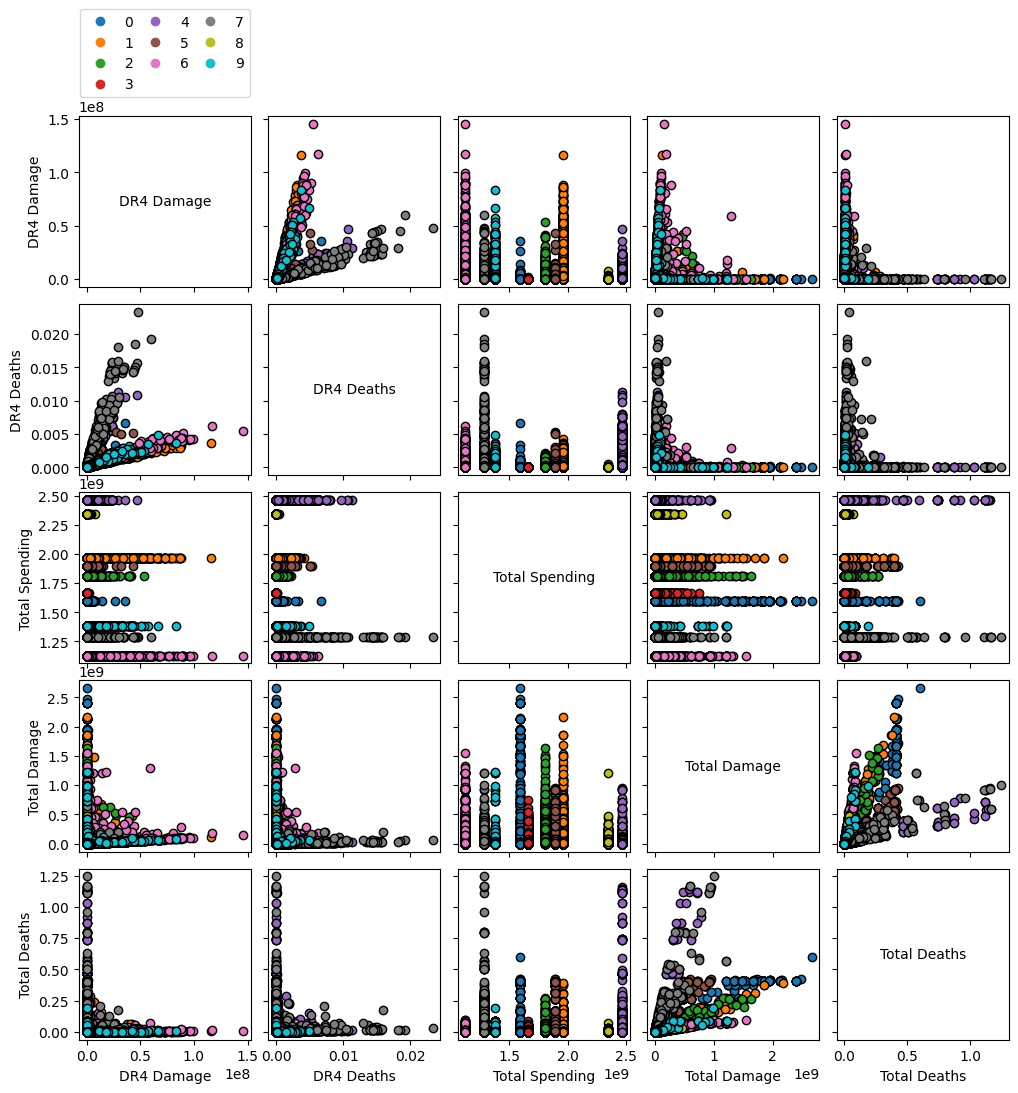

In [22]:
ylabels = {
    'A.4 Expected Annual Damage'        : 'DR4 Damage',
    'A.4 Expected Number of Deaths'     : 'DR4 Deaths',
    'Total Infrastructure Costs'        : 'Total Spending',
    'Total Expected Annual Damage'      : 'Total Damage',
    'Total Expected Number of Deaths'   : 'Total Deaths'
}
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         grouping_specifiers=range(10),
                                         legend=True, ylabels=ylabels,
                                         # edgecolor='none',
                                        )
fig.set_size_inches(12, 12)
plt.show()

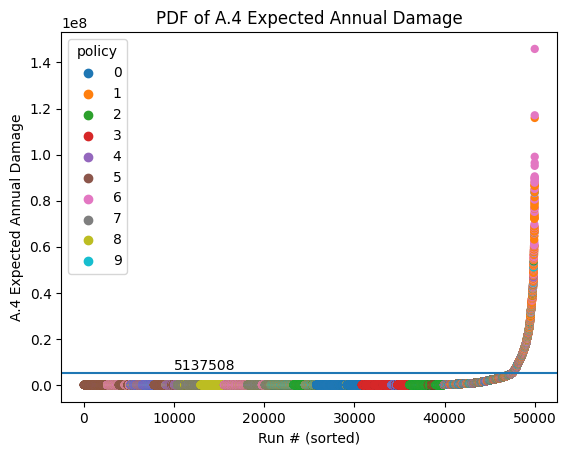

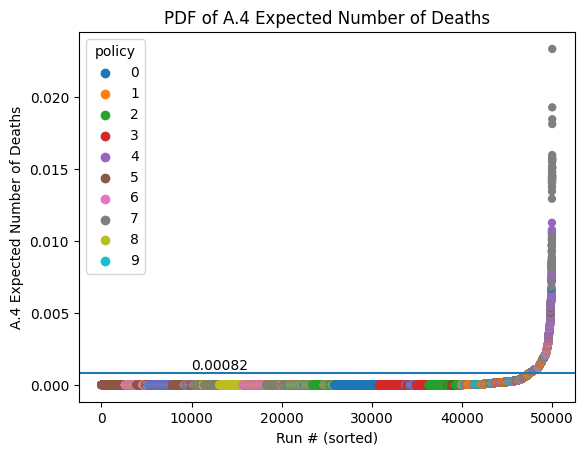

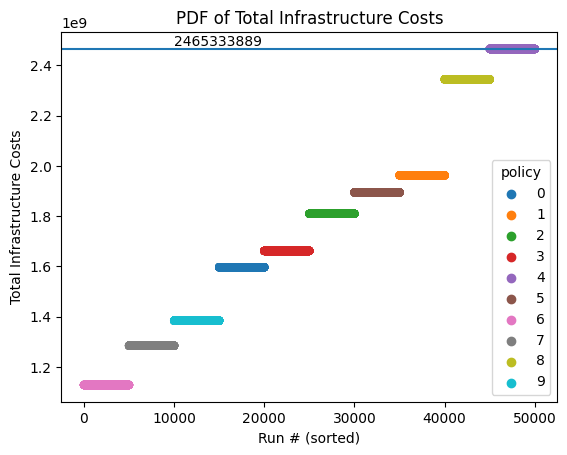

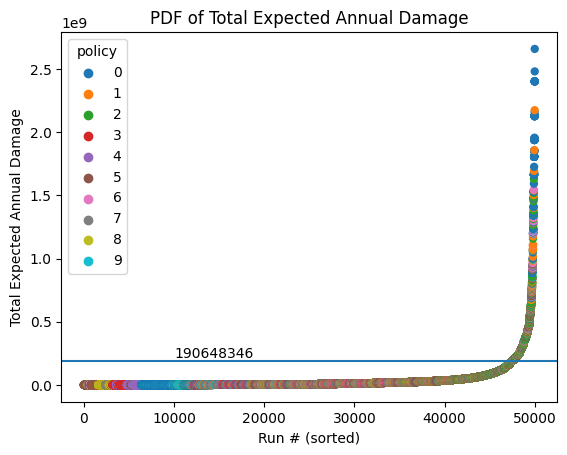

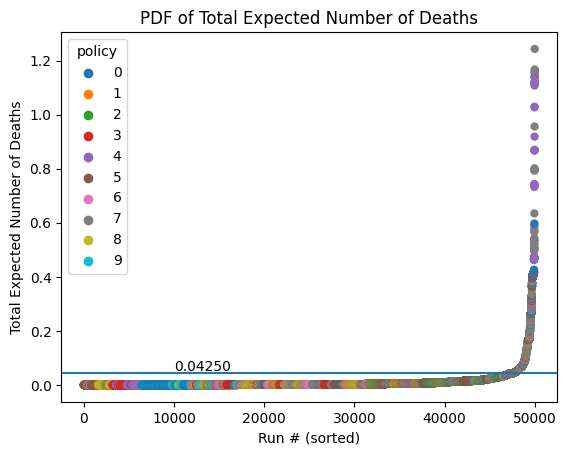

In [47]:
# for outcome in outcomes_of_interest:
for col in outcomes_of_interest:
    # col = 'A.4 Expected Annual Damage'
    # Build data for plotting
    df = pd.DataFrame()
    df[col] = outcomes[col]
    df['policy'] = experiments['policy']
    df = df.sort_values(by=col, ascending=True)
    df['x'] = np.arange(50000)
    df = df.reset_index()
    
    # plot
    ax = sns.scatterplot(data=df, x='x', y=col, hue='policy',
                         legend='full', alpha=1, linewidth=0,
                         palette='tab10')

    # draw a line at the 95th percentile
    ax.axhline(df[col][47500], label=str(df[col][47500]))
    if col.split()[-1] == 'Deaths':
        ax.annotate(text=f"{df[col][47500]:.5f}", xy=(10000, df[col][47500]),
                    xytext=(0, 3), textcoords='offset pixels')
    else:
        ax.annotate(text=f"{df[col][47500]:.0f}", xy=(10000, df[col][47500]),
                    xytext=(0, 3), textcoords='offset pixels')
    # graph setup
    plt.title('PDF of '+col)
    plt.xlabel('Run # (sorted)')
    plt.ylabel(col)
    plt.show()

-----------------------------------

## Scenario Discovery

put words here to describe what we're doing and why

In [48]:
x = experiments
y = outcomes ["A.4 Expected Annual Damage"] < 5e6
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

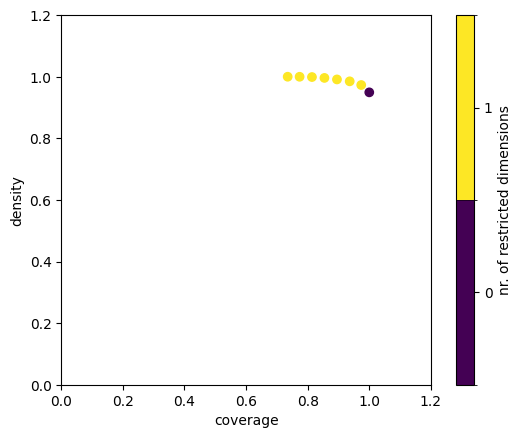

In [49]:
box1.show_tradeoff()
plt.show()

coverage    0.735099
density     1.000000
id          7.000000
mass        0.697800
mean        1.000000
res_dim     1.000000
Name: 7, dtype: float64

              box 7                            
                min       max qp value qp value
A.4_pfail  0.302232  0.999851      0.0      NaN



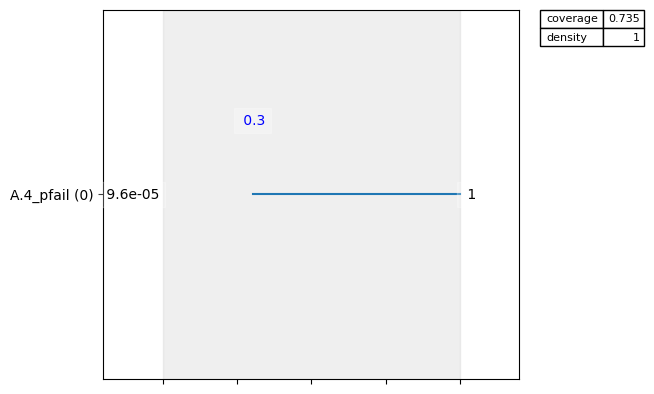

In [51]:
box1.inspect(7)
box1.inspect(7, style="graph")
plt.show()

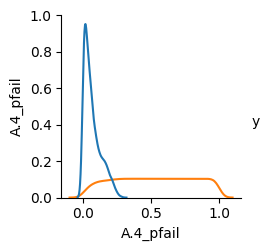

In [55]:
box1.show_pairs_scatter(7)
plt.show()

In [56]:
box2 = prim_alg.find_box()

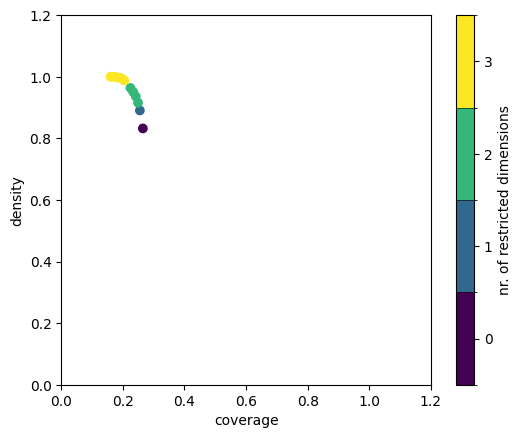

In [57]:
box2.show_tradeoff()
plt.show()

In [58]:
box3 = prim_alg.find_box()

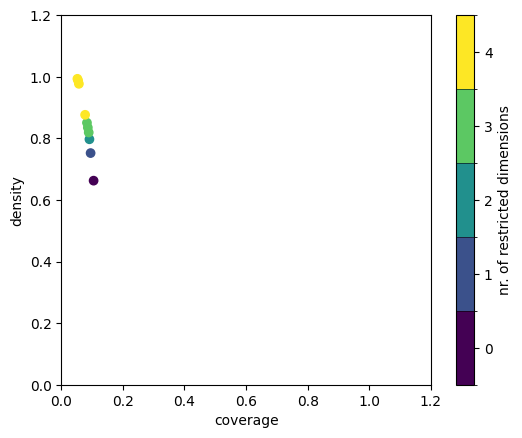

In [59]:
box3.show_tradeoff()
plt.show()